Загружаем картинку

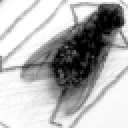

In [1]:
import Images
import ImageTransformations
import LinearAlgebra

fli = Images.load("relaxing_fly.png")
flm = convert(Array{Float32,2}, fli)
fli

Создаём базис. Базис не ортогональный, но даже нормированный нам что-то даст

In [19]:
BASIS_D1 = size(flm)[1]
BASIS_SIZE = 32768

basis = [
    convert(Array{Float16, 2}, ImageTransformations.imresize(
        rand(Bool,
            rand(2:11),
            rand(2:11)
        ),
        BASIS_D1, BASIS_D1
    ))
    for _ in 1:BASIS_SIZE
]

for i in 1:BASIS_SIZE
    basis[i] /= sum(basis[i])
    if isnan(basis[i][1,1])
        basis[i] = zeros(Float16, BASIS_D1, BASIS_D1)
    end
end
# basis

В качестве «координат» берём скалярное произведение хотя базис и не ортогональный

In [26]:
coeffs = (LinearAlgebra.dot(b, flm) for b in basis);

In [27]:
rflm = sum(c * b for (c, b) in zip(coeffs, basis));

Нормируем результат

In [31]:
zrflm = rflm - ones(BASIS_D1, BASIS_D1) * minimum(rflm)
nrflm =  zrflm / maximum(zrflm)
;

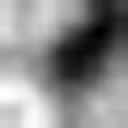

In [32]:
rfli = Images.Gray.(nrflm)
# Images.save("random_fly.png", rfli)